🔎 No available models. Downloading...
📜 Retrieving model list from server https://celltypist.cog.sanger.ac.uk/models/models.json
📚 Total models in list: 19
📂 Storing models in /home/ak431480/.celltypist/data/models
💾 Downloading model [1/19]: Immune_All_Low.pkl
💾 Downloading model [2/19]: Immune_All_High.pkl
💾 Downloading model [3/19]: Adult_Mouse_Gut.pkl
💾 Downloading model [4/19]: Autopsy_COVID19_Lung.pkl
💾 Downloading model [5/19]: COVID19_HumanChallenge_Blood.pkl
💾 Downloading model [6/19]: COVID19_Immune_Landscape.pkl
💾 Downloading model [7/19]: Cells_Fetal_Lung.pkl
💾 Downloading model [8/19]: Cells_Intestinal_Tract.pkl
💾 Downloading model [9/19]: Cells_Lung_Airway.pkl
💾 Downloading model [10/19]: Developing_Human_Brain.pkl
💾 Downloading model [11/19]: Developing_Human_Thymus.pkl
💾 Downloading model [12/19]: Developing_Mouse_Brain.pkl
💾 Downloading model [13/19]: Healthy_COVID19_PBMC.pkl
💾 Downloading model [14/19]: Human_IPF_Lung.pkl
💾 Downloading model [15/19]: Human_Lung_Atlas.

CellTypist model with 32 cell types and 6639 features
    date: 2022-07-16 08:53:00.959521
    details: immune populations combined from 20 tissues of 18 studies
    source: https://doi.org/10.1126/science.abl5197
    version: v2
    cell types: B cells, B-cell lineage, ..., pDC precursor
    features: A1BG, A2M, ..., ZYX
['B cells' 'B-cell lineage' 'Cycling cells' 'DC' 'DC precursor'
 'Double-negative thymocytes' 'Double-positive thymocytes' 'ETP'
 'Early MK' 'Endothelial cells' 'Epithelial cells' 'Erythrocytes'
 'Erythroid' 'Fibroblasts' 'Granulocytes' 'HSC/MPP' 'ILC' 'ILC precursor'
 'MNP' 'Macrophages' 'Mast cells' 'Megakaryocyte precursor'
 'Megakaryocytes/platelets' 'Mono-mac' 'Monocyte precursor' 'Monocytes'
 'Myelocytes' 'Plasma cells' 'Promyelocytes' 'T cells' 'pDC'
 'pDC precursor']
['A1BG' 'A2M' 'A2M-AS1' ... 'ZSWIM6' 'ZWINT' 'ZYX']


🔬 Input data has 93856 cells and 33668 genes
🔗 Matching reference genes in the model
🧬 6211 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!


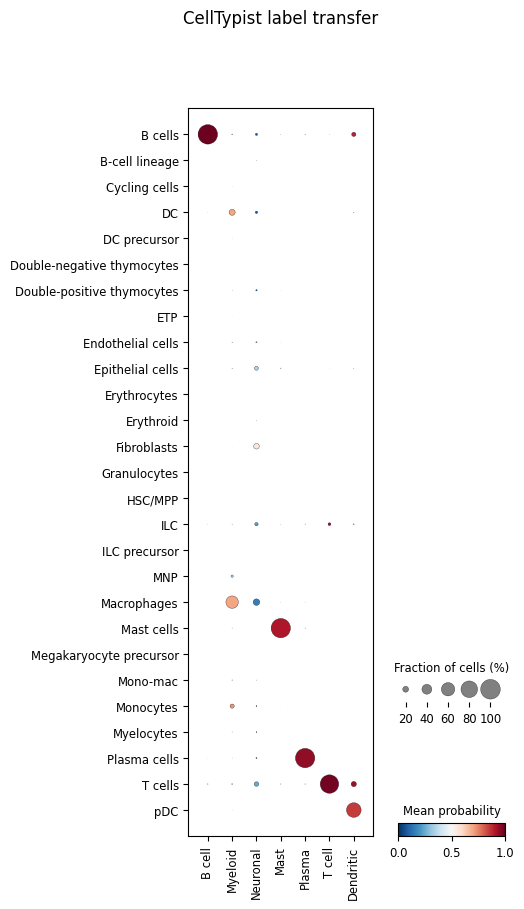

<Figure size 640x480 with 0 Axes>

In [1]:
# Author: Antti Kiviaho
# Date: 24.8.2023

import os 
os.chdir('/lustre/scratch/kiviaho/prostate_spatial')

import celltypist
from celltypist import models
import scanpy as sc

from matplotlib import pyplot as plt


#Select the model from the above list. If the `model` argument is not provided, will default to `Immune_All_Low.pkl`.
model = models.Model.load(model = 'Immune_All_High.pkl')
#The model summary information.
print(model)
#Examine cell types contained in the model.
print(model.cell_types)
#Examine genes/features contained in the model.
print(model.features)

input_file = sc.read_h5ad('./celltypist_dir/immune_cells_for_celltypist_20230823.h5ad')

#Alternatively, the model argument can be a previously loaded `Model` as in 1.4.
predictions = celltypist.annotate(input_file, model = model)#, majority_voting=True)

#Examine the correspondence between CellTypist predictions (`use_as_prediction`) and manual annotations (`use_as_reference`).
#Here, `predicted_labels` from `predictions.predicted_labels` is used as the prediction result from CellTypist.
#`use_as_prediction` can be also set as `majority_voting` (see `1.7.`).
celltypist.dotplot(predictions, use_as_reference = 'refined_celltypes', use_as_prediction = 'predicted_labels')
plt.tight_layout()
plt.savefig('./celltypist_dir/output_dotplot.png')

In [29]:
probability_threshold = 0.999
n_cells_threshold = 100

In [35]:

idxs = predictions.probability_matrix[predictions.probability_matrix.max(axis=1)>probability_threshold].index
immune_subset = predictions.predicted_labels.loc[idxs]
immune_subset = immune_subset[immune_subset['predicted_labels'].isin((immune_subset['predicted_labels'].value_counts()>n_cells_threshold).index)]

Unfiltered predictions:
predicted_labels          
T cells                       56059
Macrophages                    9655
B cells                        8589
Mast cells                     6032
ILC                            4702
DC                             3714
Monocytes                      2240
MNP                            1024
Plasma cells                    893
pDC                             246
Epithelial cells                204
Mono-mac                        123
Endothelial cells               108
Fibroblasts                      90
Myelocytes                       61
Double-positive thymocytes       55
Cycling cells                    24
DC precursor                     12
ETP                               7
HSC/MPP                           7
Double-negative thymocytes        4
B-cell lineage                    2
Erythrocytes                      1
Megakaryocyte precursor           1
Erythroid                         1
ILC precursor                     1
Granulocytes 

In [ ]:
print('Unfiltered predictions:')
predictions.predicted_labels.value_counts()


In [ ]:
print('Filtered predictions:')
immune_subset.value_counts()